<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/z-arabi/Machine-Learning.git
%cd "Machine-Learning"

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 73 (delta 29), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/Machine-Learning


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [7]:
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [8]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [9]:
from sklearn.svm import SVC
# svc == svm classifier

# one of the params of SVC > C
# in regularization = 1/c > C high > regularization low > overfit > the classification part is too string
# in svm > overfit means find a line to classify the data with high accuracy in this case the marging is not imp
# while the best line may have error for some data bue has the highest margin

# degeree for adding the degree of polynomial for the kernel of poly

# gamma var of the kernel > the higher the gamma the openner the kernels > we consider data with further distances

# C=1, kernel='rbf' > rbf is not the best all of the times > addind rbf means adding the parameters may be overfit
clf = SVC()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

# the differnce between the train and test are too high > change the training dataset > normalize

0.75
0.85


In [14]:
X = (X-X.mean(axis=0)) / X.std(axis=0)

split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [16]:
clf = SVC()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

'''
the train score is lower than test score
it can be for the hardship of the train
the noise
or many types of regularization that may influence
'''

0.903125
0.9125


'\nthe train score is lower than test score\nit can be for the hardship of the train\nthe noise\nor many types of regularization that may influence\n'

In [17]:
# kind if underfit > low the reg > high the c
clf = SVC(C=10000000, kernel='rbf')
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.978125
0.9


In [18]:
clf = SVC(C=0.000001, kernel='rbf')
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.625
0.7125


In [21]:
'''
rbf > adds one dimension > in the picture
in reality > the new dim is the #datas

linear > do nothing

poly > adds the polynomial degreees 

the data are linear separable
exp > the rbf tries to separate them with a circle > !!!
'''

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.853125
0.85


In [22]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.88125
0.925


In [23]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [24]:
preds = clf.predict(X_test)
np.mean(preds == y_test)

0.925

In [28]:
#  by default the model doesn't outputs the probability
clf = SVC(kernel='poly', probability=True)
clf.fit(X_train, y_train)

print(clf.predict_proba(X_test))

'''
in log reg > it first calculates the probability > then thereshold > then class
in svm > the probaility not calculated first
'''

[[8.24662179e-01 1.75337821e-01]
 [9.99140128e-01 8.59871858e-04]
 [9.92656411e-01 7.34358861e-03]
 [2.79706517e-01 7.20293483e-01]
 [4.67107088e-01 5.32892912e-01]
 [9.89664731e-01 1.03352694e-02]
 [7.41211773e-01 2.58788227e-01]
 [6.99180242e-01 3.00819758e-01]
 [9.09366383e-02 9.09063362e-01]
 [9.78708478e-01 2.12915218e-02]
 [9.57143855e-01 4.28561448e-02]
 [5.81047419e-01 4.18952581e-01]
 [9.01571537e-01 9.84284632e-02]
 [4.77642771e-01 5.22357229e-01]
 [7.57748604e-01 2.42251396e-01]
 [9.92340562e-01 7.65943843e-03]
 [3.42078745e-01 6.57921255e-01]
 [1.26221358e-12 1.00000000e+00]
 [3.09783146e-01 6.90216854e-01]
 [5.53052644e-06 9.99994469e-01]
 [8.81553760e-01 1.18446240e-01]
 [7.24194088e-01 2.75805912e-01]
 [4.77262757e-09 9.99999995e-01]
 [6.49660180e-01 3.50339820e-01]
 [8.70215913e-01 1.29784087e-01]
 [6.80084176e-01 3.19915824e-01]
 [1.14347754e-02 9.88565225e-01]
 [9.10991192e-01 8.90088082e-02]
 [8.47806672e-01 1.52193328e-01]
 [9.88587639e-01 1.14123609e-02]
 [7.849291

'\nin log reg > it first calculates the probability > then thereshold > then class\nin svm > the probaility not calculated first\n'

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Con

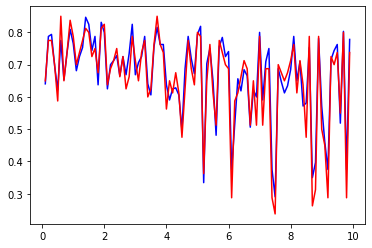

In [32]:
train_scores = []
test_scores = []
for c in np.arange(0.1, 10, 0.1):
    clf = SVC(C=c, kernel='linear', max_iter=50)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test)) 

plt.plot(np.arange(0.1, 10, 0.1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 10, 0.1), np.array(test_scores), 'r-')

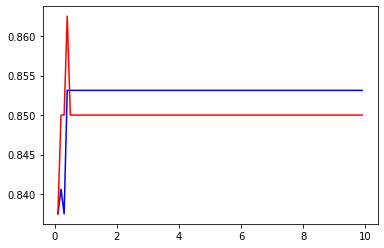

In [33]:
train_scores = []
test_scores = []
for c in np.arange(0.1, 10, 0.1):
    clf = SVC(C=c, kernel='linear')
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test)) 

plt.plot(np.arange(0.1, 10, 0.1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 10, 0.1), np.array(test_scores), 'r-')

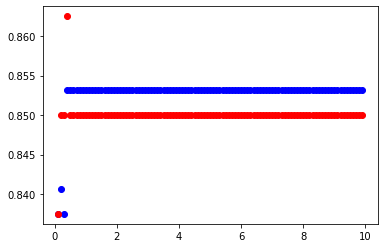

In [34]:
plt.plot(np.arange(0.1, 10, 0.1), np.array(train_scores), 'bo')
plt.plot(np.arange(0.1, 10, 0.1), np.array(test_scores), 'ro')

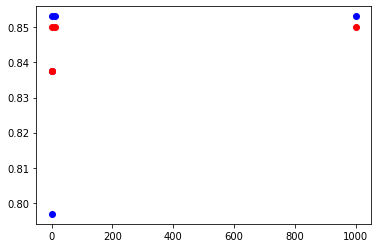

In [35]:
# but when the plots are not close to each other
x = [.01,0.1,1,10,1000]

train_scores = []
test_scores = []
for c in x:
    clf = SVC(C=c, kernel='linear')
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test)) 

plt.plot(x, np.array(train_scores), 'bo')
plt.plot(x, np.array(test_scores), 'ro')

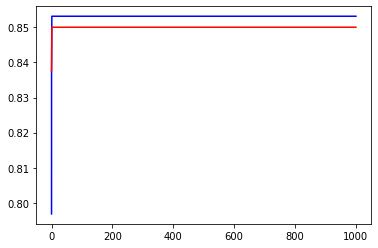

In [36]:
plt.plot(x, np.array(train_scores), 'b-')
plt.plot(x, np.array(test_scores), 'r-')

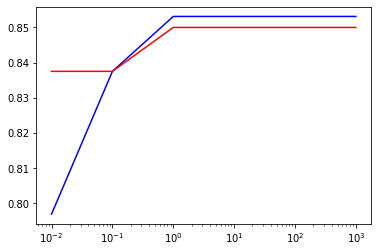

In [37]:
# the s axis is log now
plt.xscale('log') 
plt.plot(x, np.array(train_scores), 'b-')
plt.plot(x, np.array(test_scores), 'r-')

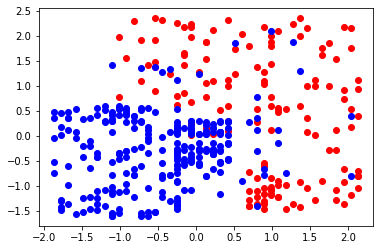

In [40]:
plt.plot(X[y==1 , 1], X[y==1, 2], 'ro')
plt.plot(X[y==0 , 1], X[y==0, 2], 'bo')

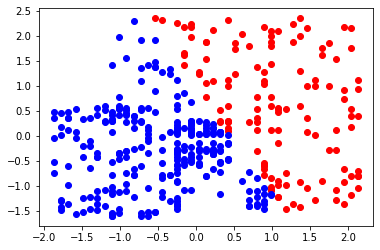

In [42]:
pred = clf.predict(X)
plt.plot(X[pred==1 , 1], X[pred==1, 2], 'ro')
plt.plot(X[pred==0 , 1], X[pred==0, 2], 'bo')
# it is the border that svm learns
# the border is not line > because x has 3 fetures we only picture the 2 features